<a href="https://colab.research.google.com/github/offsouza/yolov5_face_mask_detection/blob/master/yolomask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificação de Imagens com YOLOv5 (MASk or NO-MASK)



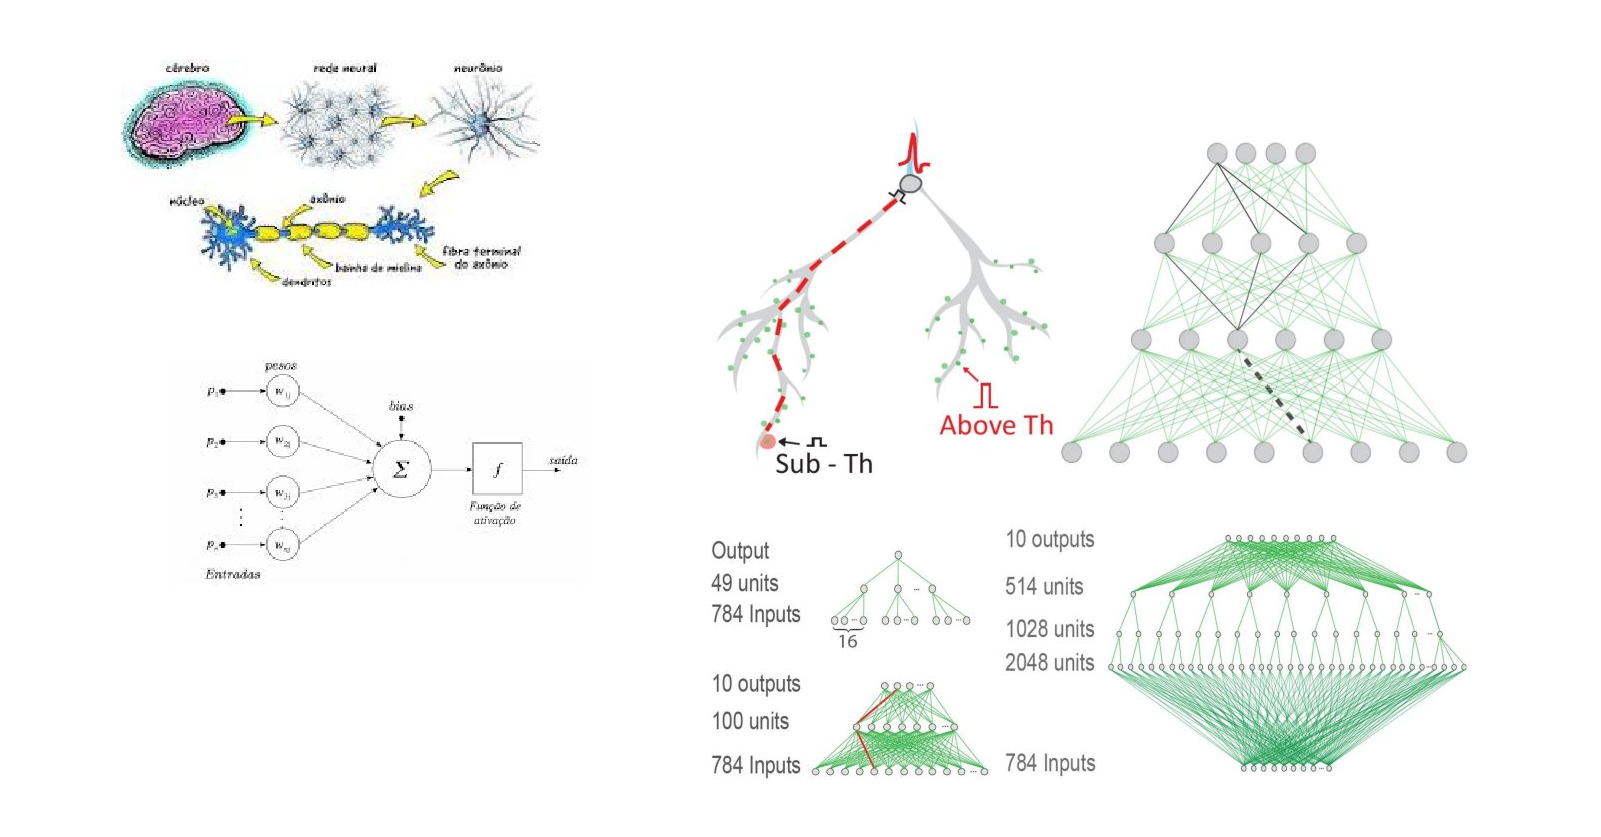

### Download do repositório da ultralytics







In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.57 MiB | 15.23 MiB/s, done.
Resolving deltas: 100% (11550/11550), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 435.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
  Using cached setuptools-72.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-man

/content/yolov5


### Acessando o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import torch
#from IPython.display import Image  # for displaying images
#from utils.google_utils import gdrive_download  # for downloading models/datasets

#print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

###Download do Dataset e Arquivos (.yaml)

link: https://public.roboflow.ai/object-detection/mask-wearing/1


In [ ]:
%cd /content
# Download dataset
!wget https://github.com/offsouza/yolov5_face_mask_detection/raw/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
# Download arquivo.yaml
!wget https://raw.githubusercontent.com/offsouza/yolov5_face_mask_detection/master/mask_yolov5s.yaml


/content
--2024-08-01 23:29:42--  https://github.com/offsouza/yolov5_face_mask_detection/raw/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/offsouza/yolov5_face_mask_detection/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip [following]
--2024-08-01 23:29:43--  https://raw.githubusercontent.com/offsouza/yolov5_face_mask_detection/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3882094 (3.7M) [application/zip]
Saving to: ‘Mask_Wearing.v1-416x416-black-paddin

### Descompactando arquivos

In [ ]:
!unzip -o Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip

Archive:  Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
 extracting: test/images/w1240-p16x9-0e48e0098f6e832f27d8b581b33bbc72b9967a63_jpg.rf.34ed1e8f70eebdabaf43ab9d40dc1c9b.jpg  
 extracting: test/images/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg  
 extracting: test/images/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg  
 extracting: test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg  
 extracting: test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg  
 extracting: test/images/r1p00017o8171pnq407_jpg.rf.6fd25b7219a249e97f54fcabf2b52726.jpg  
 extracting: test/images/w1240-p16x9-2019-10-04t075956z_1862636027_rc15d4d49d00_rtrmadp_3_hongkong-protests_jpg.rf.061f2c7f7d17a0b472510eadb717a0b9.jpg  
 extracting: test/images/w1240-p16x9-fa978043deff83fed485af12d16e39c61398fc30_jpg.rf.185d01b7e55e049c6661b8ecd49679fc.jpg  
 extracting: test/images/1539151332

### Treinamento

In [ ]:
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 300 --data '../data.yaml' --cfg ../mask_yolov5s.yaml --weights '' --name mask_yolov5s_results --nosave --cache

/content/yolov5
2024-08-01 23:43:06.587303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 23:43:06.976261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 23:43:07.089410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=../mask_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=Fa

### Treinamento

In [ ]:
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 300 --data '../data.yaml' --cfg ../mask_yolov5s.yaml --weights '' --name mask_yolov5s_results --nosave --cache

Streaming output truncated to the last 5000 lines.
      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  0% 0/7 [00:00<?, ?it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     37/299      1.94G    0.08744    0.05398    0.01458        126        416:  14% 1/7 [00:00<00:01,  3.73it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     37/299      1.94G    0.08593     0.0645    0.01417        197        416:  29% 2/7 [00:00<00:01,  4.54it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     37/299      1.94G    0.08487    0.06271    0.01

### Treinamento (Outra forma)

In [ ]:
# !python train.py  --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt

2024-07-30 12:00:10.155492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 12:00:10.155543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 12:00:10.156898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, op

### Principais métricas

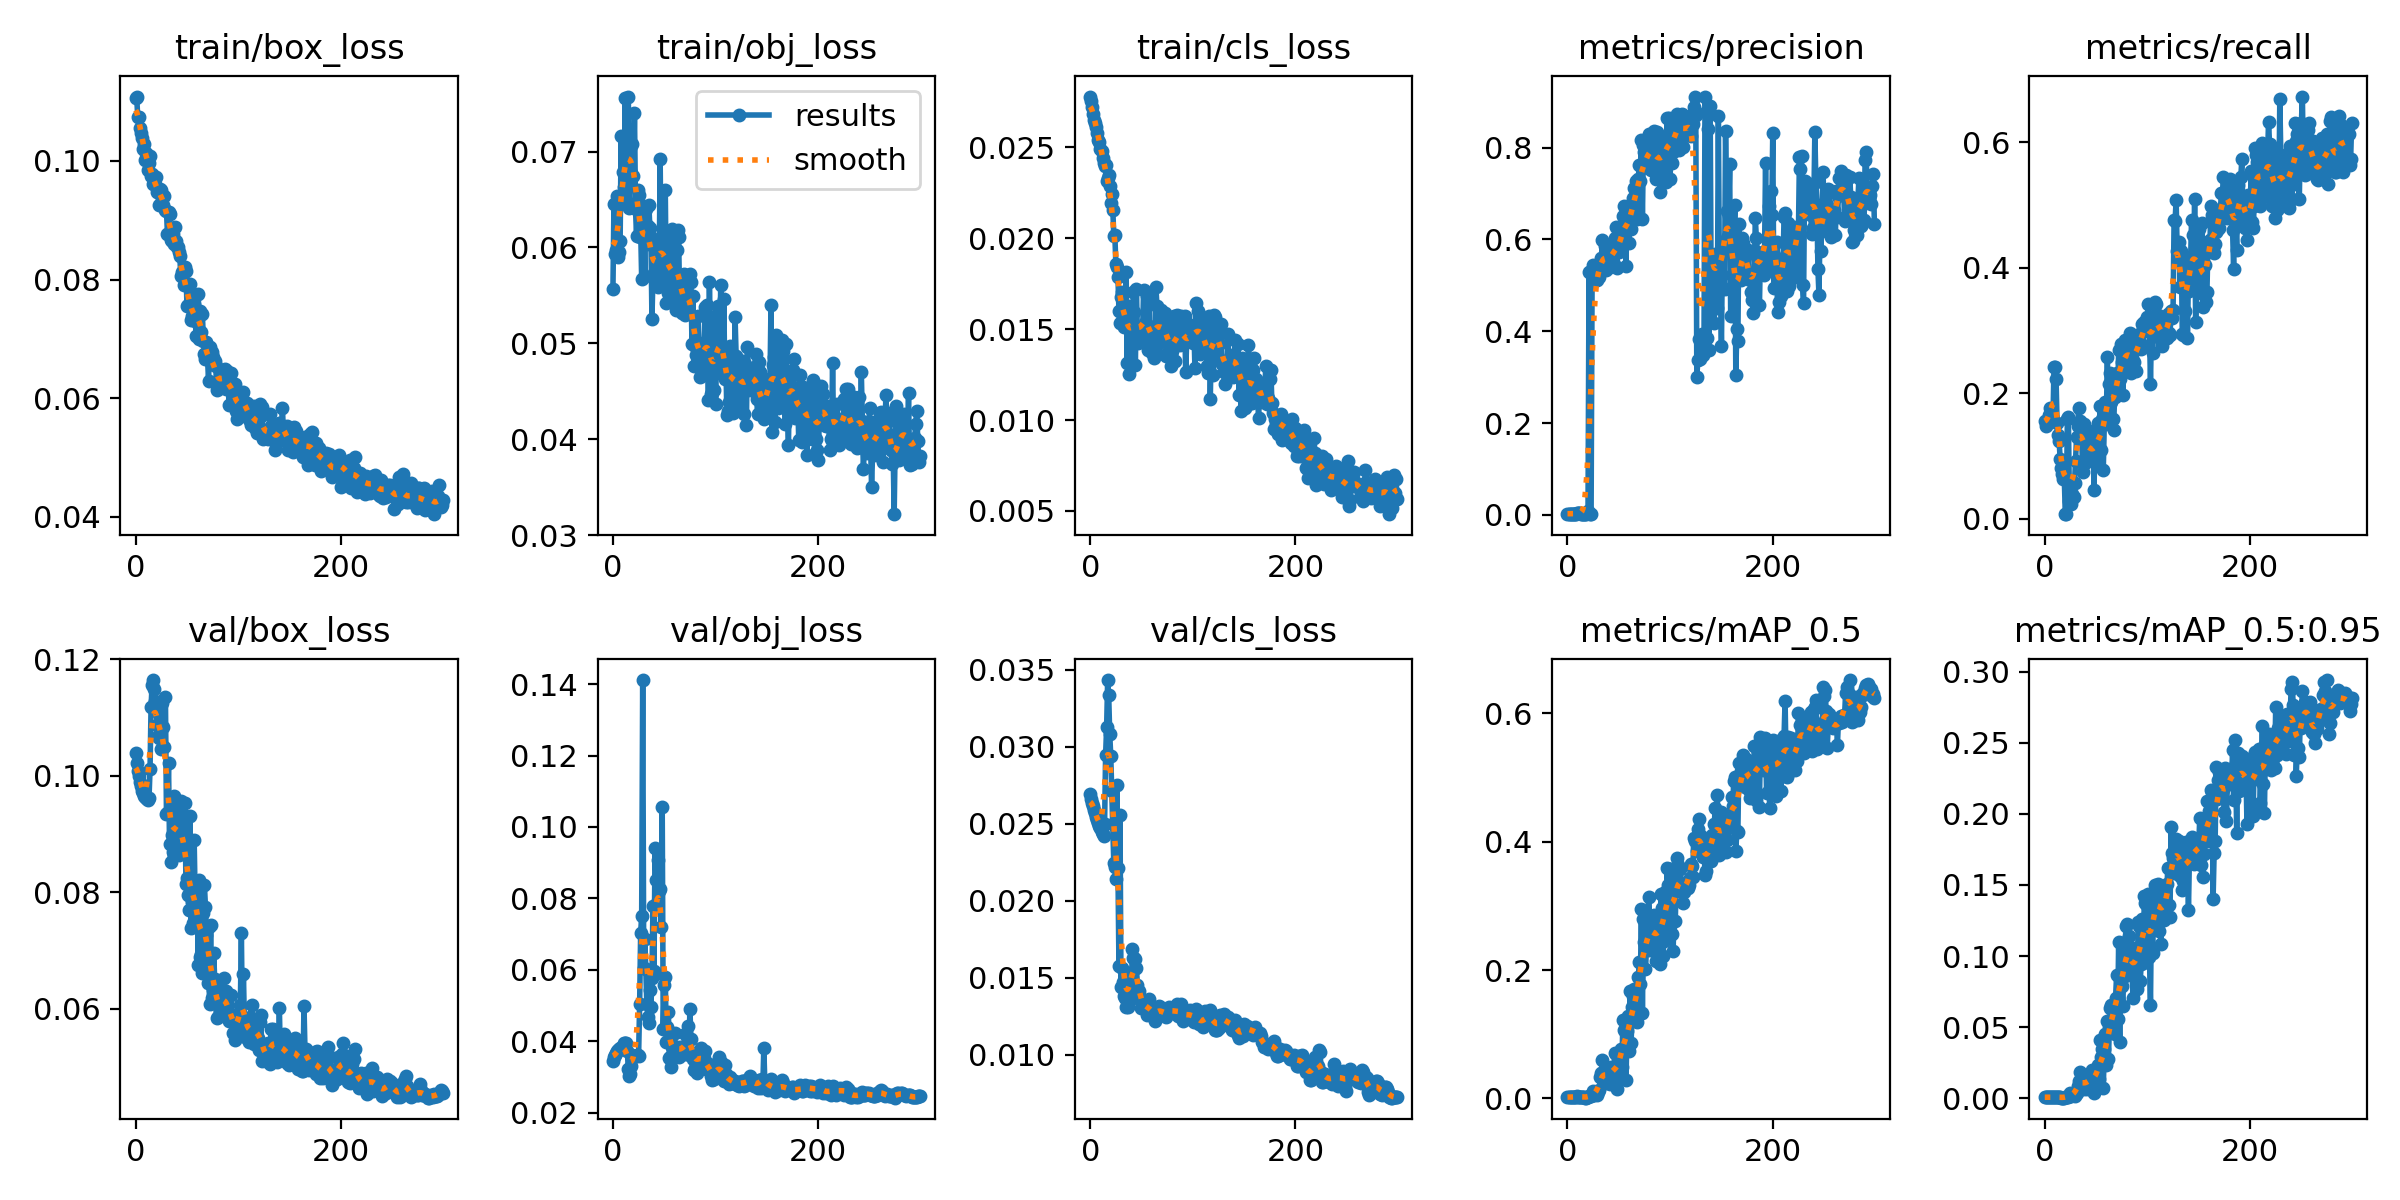

In [ ]:
from IPython.display import Image
Image('/content/yolov5/runs/train/mask_yolov5s_results2/results.png')

### Verificação

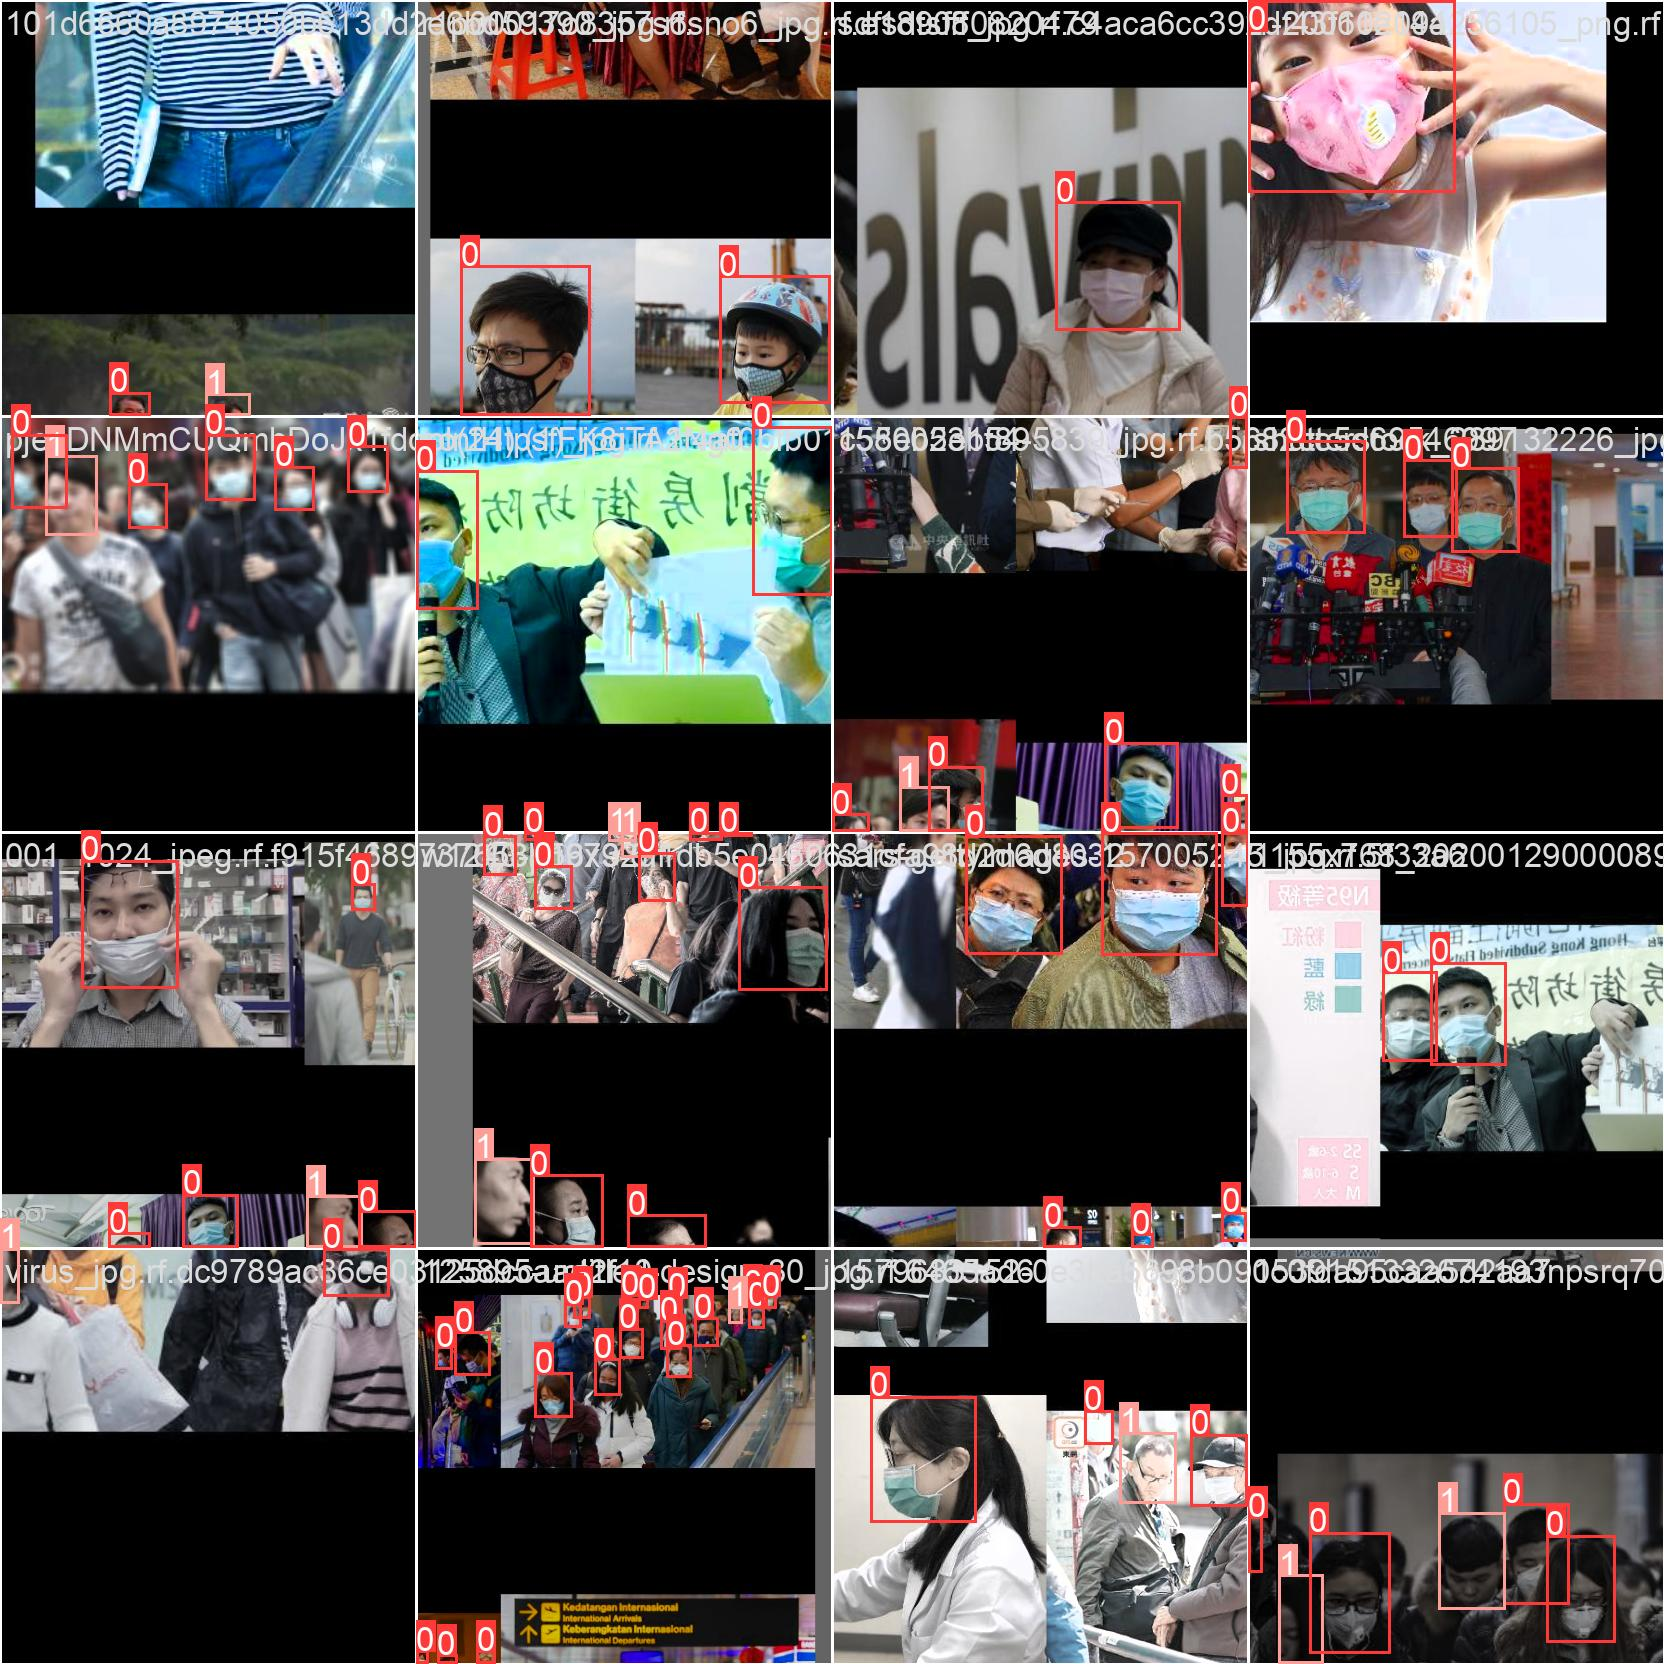

In [ ]:
Image('/content/yolov5/runs/train/mask_yolov5s_results2/train_batch2.jpg')

### Testando modelo em uma única imagem

In [ ]:
!wget -O /content/mask.png https://nacoesunidas.org/wp-content/uploads/2020/04/mascaras_EUA-e1586353251229.jpg

--2024-07-30 12:14:22--  https://nacoesunidas.org/wp-content/uploads/2020/04/mascaras_EUA-e1586353251229.jpg
Resolving nacoesunidas.org (nacoesunidas.org)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3121::, ...
Connecting to nacoesunidas.org (nacoesunidas.org)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://brasil.un.org/ [following]
--2024-07-30 12:14:23--  https://brasil.un.org/
Resolving brasil.un.org (brasil.un.org)... 13.107.246.67, 2620:1ec:bdf::67
Connecting to brasil.un.org (brasil.un.org)|13.107.246.67|:443... failed: Connection timed out.
Connecting to brasil.un.org (brasil.un.org)|2620:1ec:bdf::67|:443... failed: Cannot assign requested address.
Retrying.

--2024-07-30 12:16:32--  (try: 2)  https://brasil.un.org/
Connecting to brasil.un.org (brasil.un.org)|13.107.246.67|:443... failed: Connection timed out.
Connecting to brasil.un.org (brasil.un.org)|2620:1ec:bdf::67|:443... failed: Cannot assign requested address.

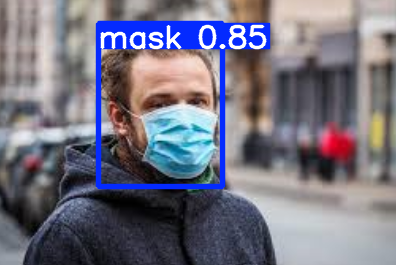

In [ ]:
Image('/content/yolov5/runs/detect/exp2/mask2.png')